<a href="https://colab.research.google.com/github/yeahginny/Data-Analysis-School/blob/main/0831_NetworkX(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

## Zachary's karate club 네트워크 분석

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


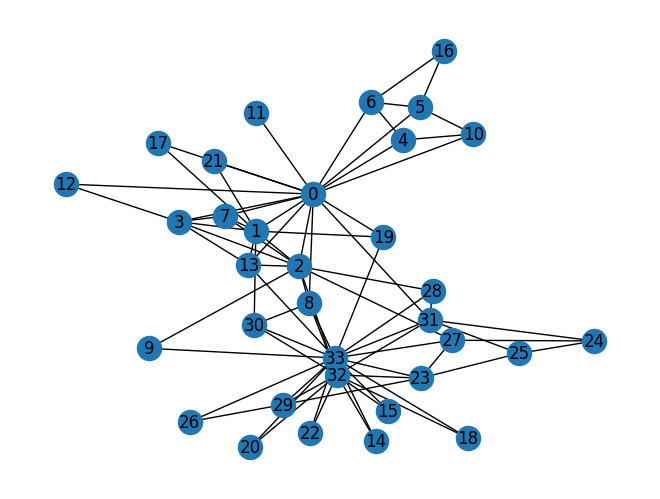

In [1]:
# 데이터 불러오기
G = nx.karate_club_graph()

# 기본 정보 확인
print(G)

# 네트워크 시각화
nx.draw(G, with_labels=True)
plt.show()

### 중심성 지표를 활용한 분석 및 시각화

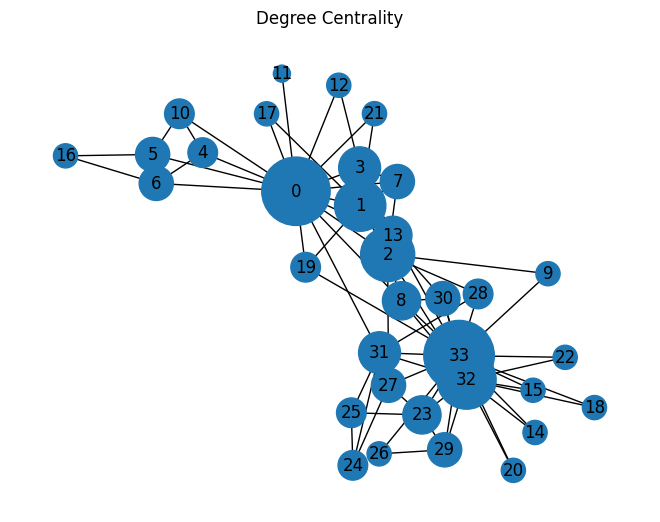

In [2]:
# 연결 중심성 계산 및 시각화
degree_centrality = nx.degree_centrality(G)
nx.draw(G, with_labels=True, node_size=[v * 5000 for v in degree_centrality.values()])
plt.title("Degree Centrality")
plt.show()

In [4]:
degree_centrality

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

### 커뮤니티 탐지 및 결과 해석

In [ ]:
# Louvain 방법을 이용한 커뮤니티 탐지는 community 모듈을 활용
from community import community_louvain

# 커뮤니티 탐지
partition = community_louvain.best_partition(G)

In [7]:
partition

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 1,
 5: 1,
 6: 1,
 7: 0,
 8: 3,
 9: 3,
 10: 1,
 11: 0,
 12: 0,
 13: 0,
 14: 3,
 15: 3,
 16: 1,
 17: 0,
 18: 3,
 19: 0,
 20: 3,
 21: 0,
 22: 3,
 23: 2,
 24: 2,
 25: 2,
 26: 3,
 27: 2,
 28: 2,
 29: 3,
 30: 3,
 31: 2,
 32: 3,
 33: 3}

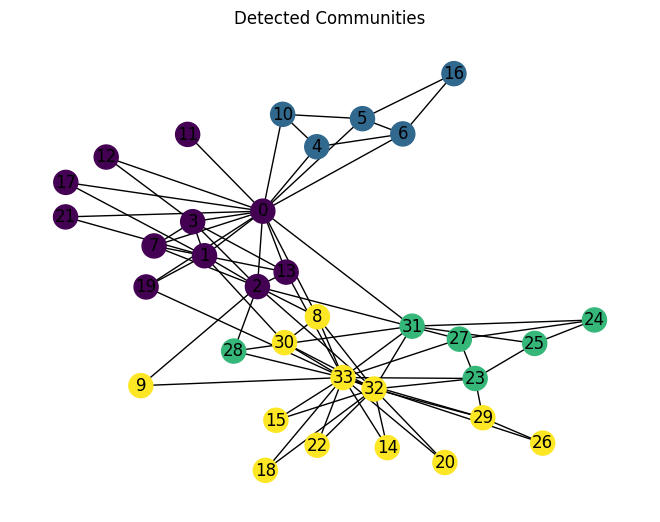

In [5]:
# 결과 시각화
nx.draw(G, with_labels=True, node_color=list(partition.values()))
plt.title("Detected Communities")
plt.show()

## Florentine Families 네트워크 분석

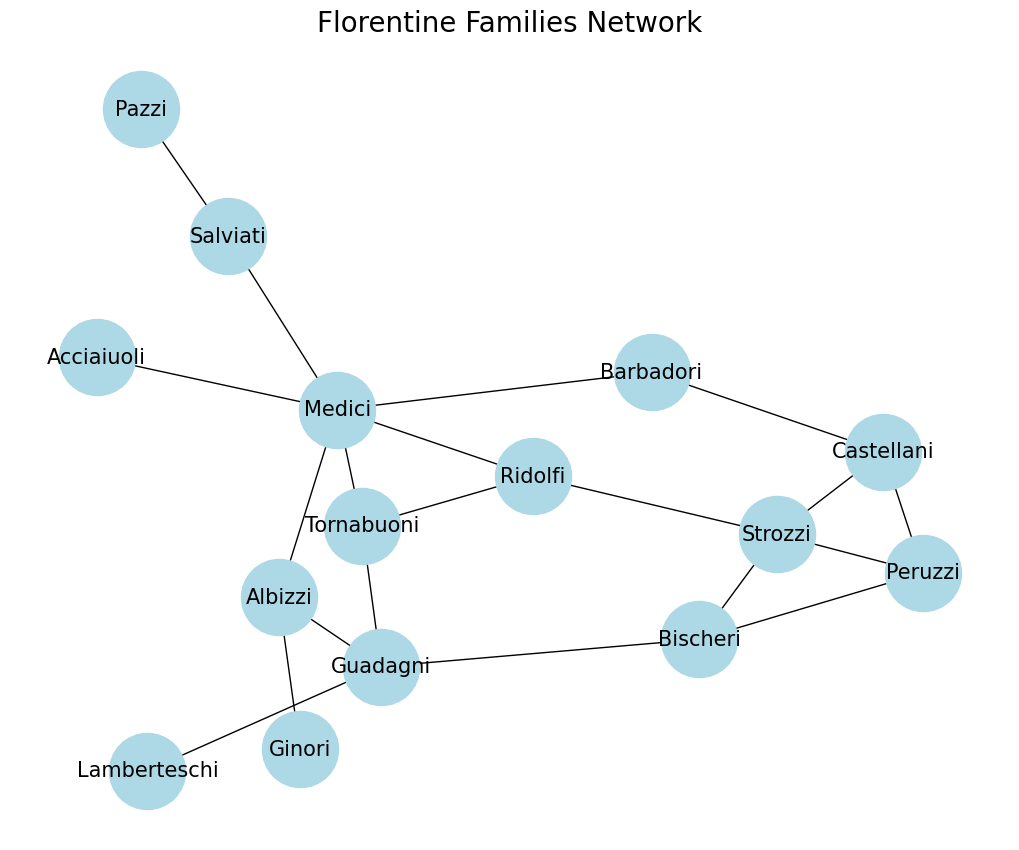

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.florentine_families_graph()
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_size=3000, node_color="lightblue", font_size=15)
plt.title("Florentine Families Network", fontsize=20)
plt.show()

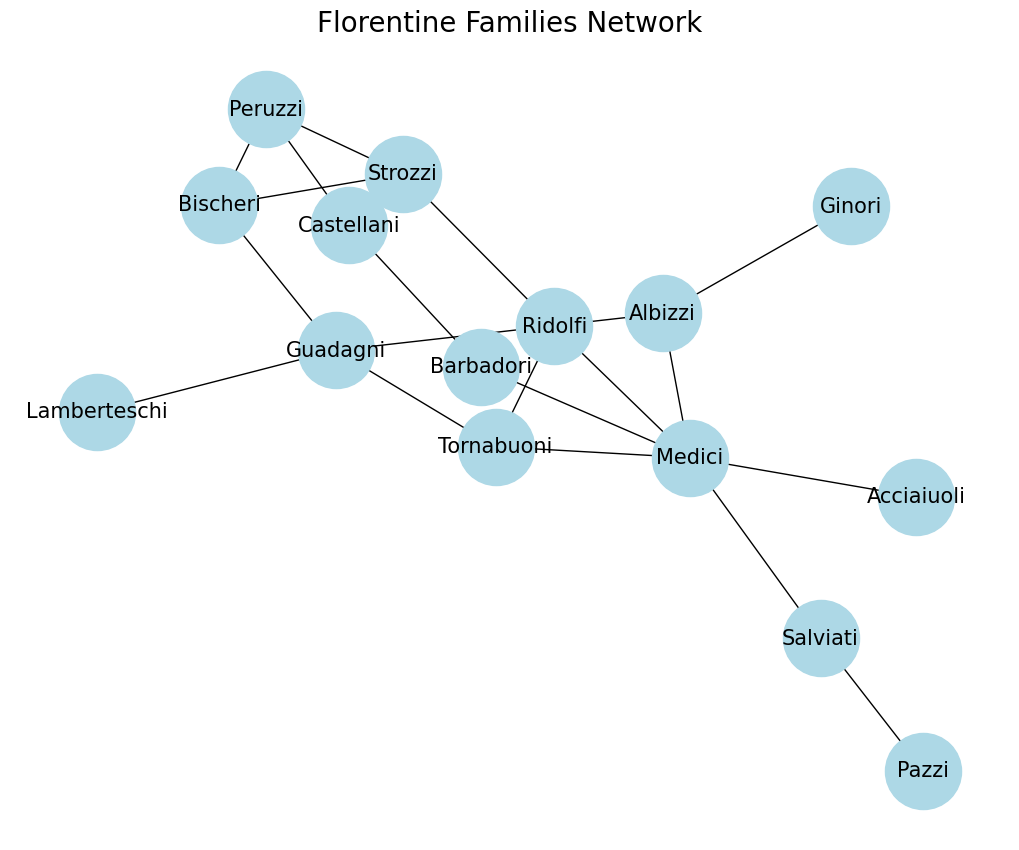

In [8]:
# 데이터 불러오기 및 시각화
G_florentine = nx.florentine_families_graph()

plt.figure(figsize=(10, 8))
nx.draw(G_florentine, with_labels=True, node_size=3000, node_color="lightblue", font_size=15)
plt.title("Florentine Families Network", fontsize=20)
plt.show()

In [9]:
# 데이터 탐색: 가장 많은 결혼 관계를 가진 가문 확인
degree_sequence_florentine = sorted(G_florentine.degree(), key=lambda x: x[1], reverse=True)

In [11]:
# 네트워크 밀도 계산
density_florentine = nx.density(G_florentine)

In [12]:
degree_sequence_florentine[:5], density_florentine

([('Medici', 6),
  ('Strozzi', 4),
  ('Guadagni', 4),
  ('Castellani', 3),
  ('Peruzzi', 3)],
 0.19047619047619047)

In [13]:
# 중심성 지표 계산
closeness_centrality_florentine = nx.closeness_centrality(G_florentine)
betweenness_centrality_florentine = nx.betweenness_centrality(G_florentine)

sorted_closeness_florentine = sorted(closeness_centrality_florentine.items(), key=lambda x: x[1], reverse=True)
sorted_betweenness_florentine = sorted(betweenness_centrality_florentine.items(), key=lambda x: x[1], reverse=True)

sorted_closeness_florentine[:5], sorted_betweenness_florentine[:5]

([('Medici', 0.56),
  ('Ridolfi', 0.5),
  ('Tornabuoni', 0.4827586206896552),
  ('Albizzi', 0.4827586206896552),
  ('Guadagni', 0.4666666666666667)],
 [('Medici', 0.521978021978022),
  ('Guadagni', 0.2545787545787546),
  ('Albizzi', 0.21245421245421245),
  ('Salviati', 0.14285714285714288),
  ('Ridolfi', 0.11355311355311355)])

- **근접 중심성 (Closeness Centrality)**: 모든 다른 노드까지의 평균 거리
→ 값이 높을수록 정보나 자원을 빠르게 전파할 수 있는 역량
- **매개 중심성 (Betweenness Centrality)**: 노드를 지나가는 모든 최단 경로의 비율
→ 값이 높을수록 브릿지나 허브 역할을 하는것으로 간주

## Girvan-Newman 알고리즘

In [14]:
from networkx.algorithms.community import girvan_newman

# Girvan-Newman 알고리즘을 사용한 커뮤니티 탐지
communities = girvan_newman(G_florentine)
top_level_communities = next(communities)
community_groups = sorted(map(sorted, top_level_communities))

community_groups

[['Acciaiuoli',
  'Albizzi',
  'Barbadori',
  'Bischeri',
  'Castellani',
  'Ginori',
  'Guadagni',
  'Lamberteschi',
  'Medici',
  'Peruzzi',
  'Ridolfi',
  'Strozzi',
  'Tornabuoni'],
 ['Pazzi', 'Salviati']]

## 공급망 최적화 문제
* 시나리오 : 아이템 A는 여러 공급자로부터 구입되어 중앙 창고에 저장되며, 이 중앙 창고에서 여러 고객에게 배송됩니다. 각 공급자와 중앙 창고, 그리고 중앙 창고와 고객 사이의 운송 비용이 다릅니다. 우리의 목표는 총 운송 비용을 최소화하는 방법을 찾는 것입니다.

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

In [16]:
# Create a directed graph
G = nx.DiGraph()

In [17]:
# Add nodes
suppliers = ['S1', 'S2', 'S3']
customers = ['C1', 'C2', 'C3']
warehouse = 'W'

In [18]:
G.add_nodes_from(suppliers, role='supplier')
G.add_nodes_from(customers, role='customer')
G.add_node(warehouse, role='warehouse')

In [19]:
# Add edges with weights (costs)
G.add_edge('S1', 'W', weight=5)
G.add_edge('S2', 'W', weight=7)
G.add_edge('S3', 'W', weight=6)
G.add_edge('W', 'C1', weight=2)
G.add_edge('W', 'C2', weight=4)
G.add_edge('W', 'C3', weight=3)

In [20]:
# Identify the minimum cost paths
min_cost_supplier = min([(data['weight'], supplier) for supplier, _, data in G.edges(data=True) if G.nodes[supplier]['role'] == 'supplier'])[1]
min_cost_customer = min([(data['weight'], customer) for _, customer, data in G.edges(data=True) if G.nodes[customer]['role'] == 'customer'])[1]

In [21]:
min_cost_supplier, min_cost_customer

('S1', 'C1')

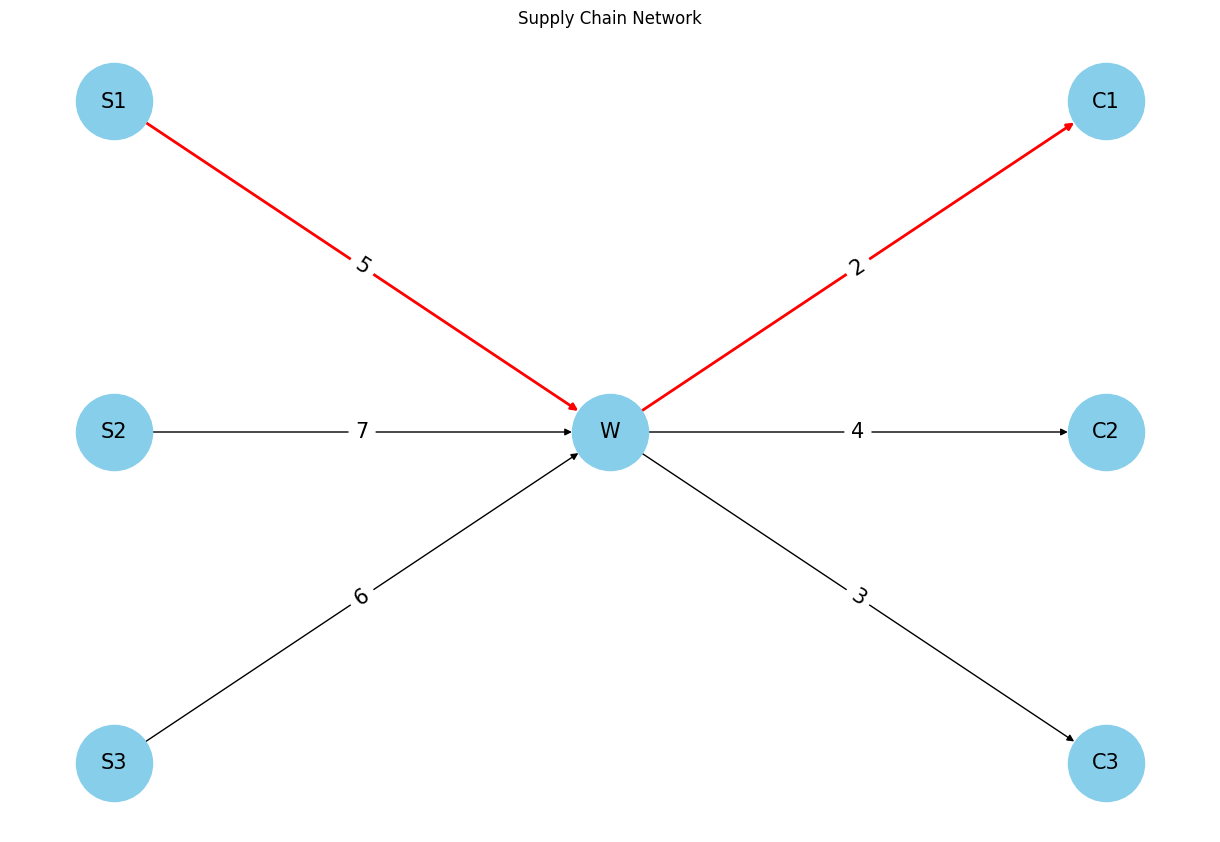

In [22]:
# Plot the network
plt.figure(figsize=(12, 8))
pos = {
    'S1': (1, 2), 'S2': (1, 1), 'S3': (1, 0),
    'W': (2, 1),
    'C1': (3, 2), 'C2': (3, 1), 'C3': (3, 0)
}

# pos 딕셔너리는 각 노드의 (x, y) 위치를 나타냅니다. 이를 통해 그래프를 그릴 때 노드의 위치를 정의합니다.
# 최소 비용의 공급업체에서 창고로, 그리고 창고에서 최소 비용의 고객으로 향하는 엣지는
# 빨간색과 두꺼운 너비로 표시되며, 나머지 엣지는 검은색과 얇은 너비로 표시됩니다.

edge_colors = ['red' if (u == min_cost_supplier and v == 'W') or (u == 'W' and v == min_cost_customer) else 'black' for u, v in G.edges()]
edge_widths = [2 if (u == min_cost_supplier and v == 'W') or (u == 'W' and v == min_cost_customer) else 1 for u, v in G.edges()]
# 각 엣지의 무게(비용) 값을 레이블로 사용하기 위해 nx.get_edge_attributes 함수를 사용하여 무게 값을 가져옵니다.
labels = nx.get_edge_attributes(G, 'weight')

nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', edge_color=edge_colors, width=edge_widths, font_size=15)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=15)
plt.title("Supply Chain Network")
plt.show()

## 웹사이트 네비게이션 문제

In [23]:
# 웹사이트 그래프 생성
G_website = nx.DiGraph()

In [24]:
# 웹 페이지 노드 추가
pages = ['Home', 'Category', 'Product', 'Cart', 'Checkout', 'Confirmation']
G_website.add_nodes_from(pages)

In [25]:
# 엣지와 무게(사용자 수) 추가
G_website.add_edge('Home', 'Category', weight=1000)
G_website.add_edge('Category', 'Product', weight=800)
G_website.add_edge('Product', 'Cart', weight=300)
G_website.add_edge('Cart', 'Checkout', weight=150)
G_website.add_edge('Checkout', 'Confirmation', weight=100)
G_website.add_edge('Product', 'Home', weight=400)
G_website.add_edge('Cart', 'Home', weight=100)

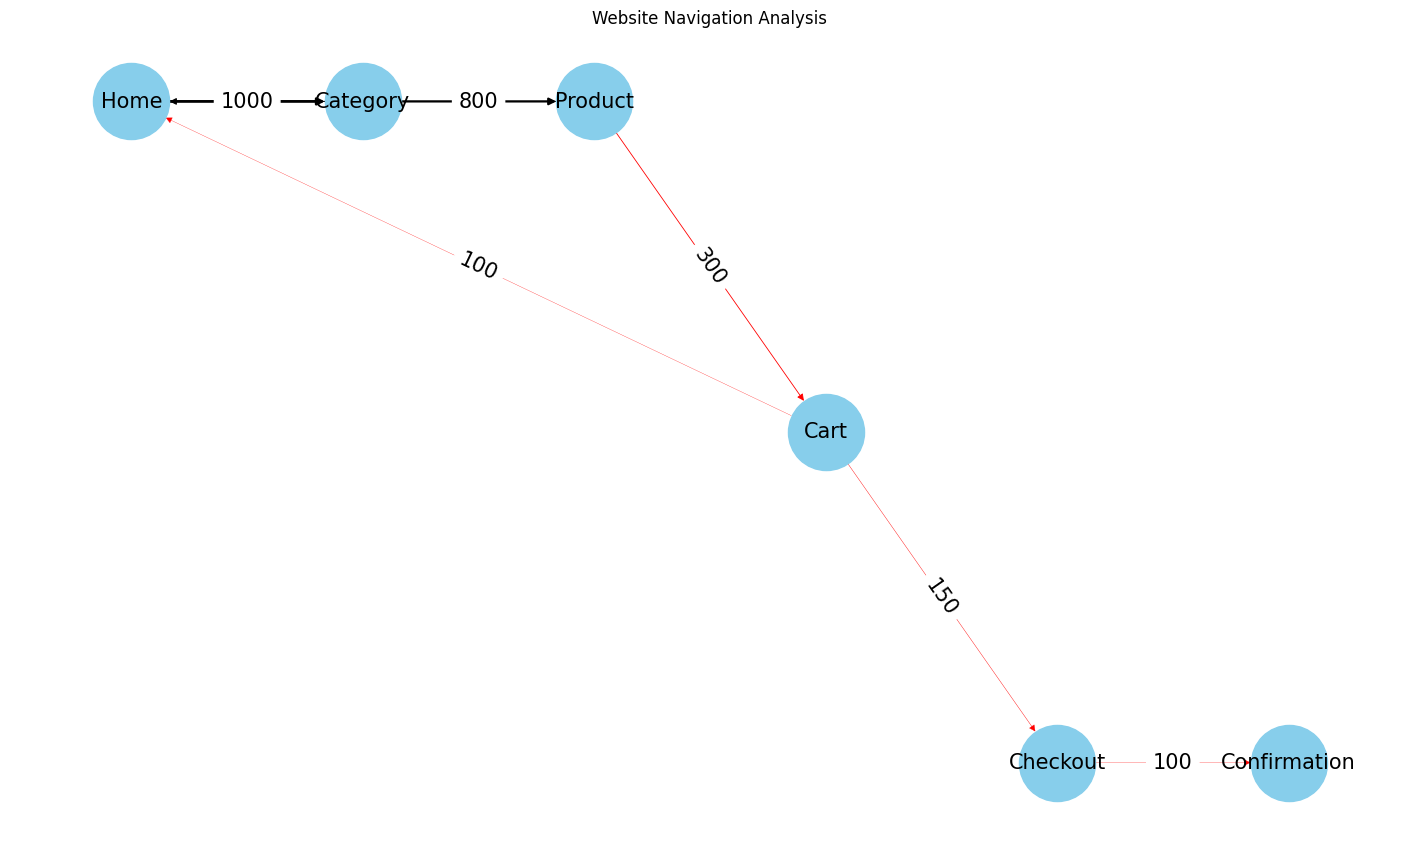

In [26]:
# 그래프 시각화 설정
plt.figure(figsize=(14, 8))
pos_website = {
    'Home': (1, 3), 'Category': (2, 3), 'Product': (3, 3),
    'Cart': (4, 2.5), 'Checkout': (5, 2), 'Confirmation': (6, 2)
}
edge_colors_website = ['red' if data['weight'] < 400 else 'black' for _, _, data in G_website.edges(data=True)]
edge_widths_website = [data['weight'] / 500 for _, _, data in G_website.edges(data=True)]


labels_website = nx.get_edge_attributes(G_website, 'weight')

nx.draw(G_website, pos_website, with_labels=True, node_size=3000, node_color='skyblue', edge_color=edge_colors_website, width=edge_widths_website, font_size=15)
nx.draw_networkx_edge_labels(G_website, pos_website, edge_labels=labels_website, font_size=15)
plt.title("Website Navigation Analysis")
plt.show()

- 사용자 수가 400명 미만인 엣지는 빨간색으로, 그 이상은 검은색으로 표시됩니다.
- 엣지의 너비는 사용자 수에 비례하게 설정됩니다.
- 각 엣지의 레이블로 사용자 수를 설정합니다.

In [27]:
labels_website = nx.get_edge_attributes(G_website, 'weight')

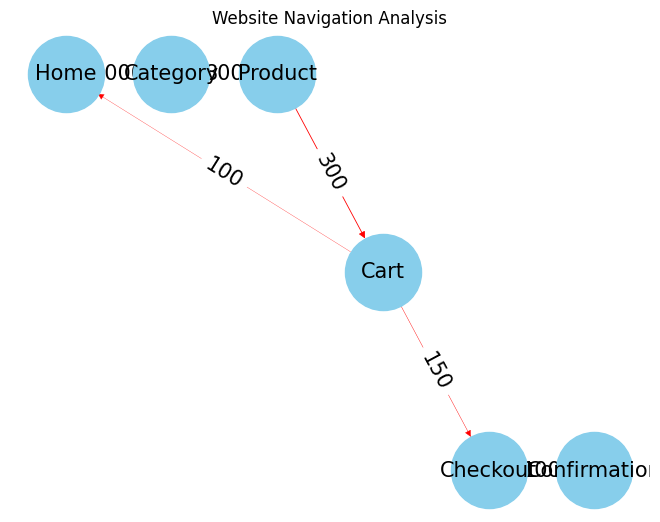

In [28]:
nx.draw(G_website, pos_website, with_labels=True, node_size=3000, node_color='skyblue', edge_color=edge_colors_website, width=edge_widths_website, font_size=15)
nx.draw_networkx_edge_labels(G_website, pos_website, edge_labels=labels_website, font_size=15)
plt.title("Website Navigation Analysis")
plt.show()